# California housing analysis

Data Analytics Meeting 2023

Kacper Kędzierski (👋 [k-kedzierski](https://github.com/k-kedzierski))

In [1]:
import sys
sys.version

'3.10.8 (main, Oct 13 2022, 09:48:40) [Clang 14.0.0 (clang-1400.0.29.102)]'

In [2]:
HOUSING_DATASET_URL: str = "https://github.com/ageron/data/raw/main/housing.tgz"

## Dane

Pobranie i załadowanie danych do ramki `pd.DataFrame`

In [3]:
from pathlib import Path
import pandas as pd
import urllib.request
import tarfile

def load_data() -> pd.DataFrame:
    housing_tar_path = Path("../data/housing.tgz")

    if not housing_tar_path.exists():
        housing_tar_path.parent.mkdir(parents=True, exist_ok=True)
        urllib.request.urlretrieve(url=HOUSING_DATASET_URL, filename=housing_tar_path)
        with tarfile.open(housing_tar_path) as f:
            f.extractall(path=housing_tar_path.parent)

    return pd.read_csv("../data/housing/housing.csv")


In [4]:
df = load_data()

## Eksploracja danych

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [8]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

Dystrybucje zmiennych w zbiorze danych

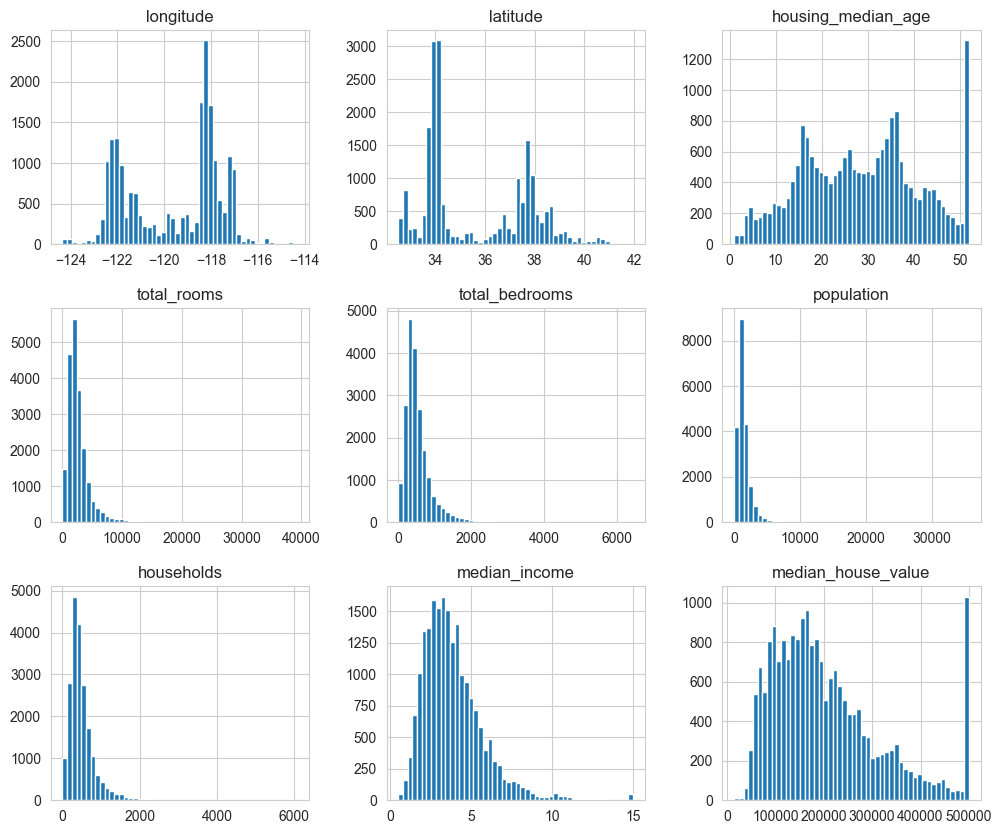

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

df.hist(bins=50, figsize=(12, 10))
plt.show()

## Podział zbioru na train/test

In [10]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train: pd.DataFrame = df_train

## Eksploracyjna analiza danych

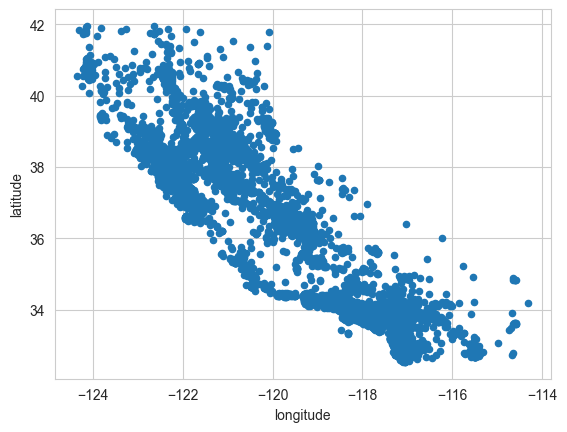

In [11]:
df_train.plot(kind="scatter", x="longitude", y="latitude")
plt.show()

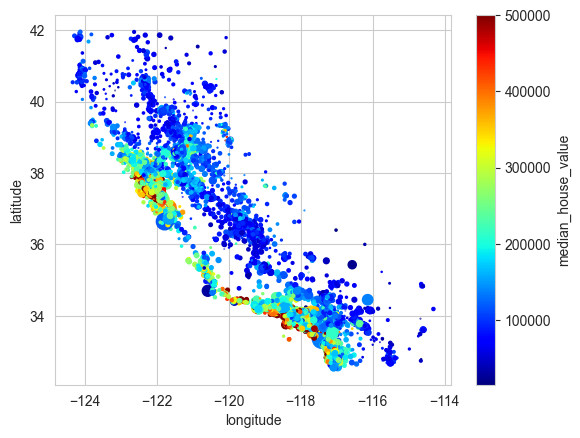

In [12]:
df_train.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    c="median_house_value",
    s=df_train["population"] / 200,
    cmap="jet",
    colorbar=True
)
plt.show()

Pomocnicza zmienna `Y_LABEL` - etykieta kolumny zmiennej zależnej

In [13]:
Y_LABEL: str = "median_house_value"

In [14]:
corr = df_train.drop(labels="ocean_proximity", axis=1).corr()
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924341,-0.110786,0.043100,0.069439,0.100706,0.056318,-0.014592,-0.043603
latitude,-0.924341,1.000000,0.012640,-0.036327,-0.069283,-0.110514,-0.073915,-0.079259,-0.146324
housing_median_age,-0.110786,0.012640,1.000000,-0.362433,-0.318544,-0.291842,-0.301198,-0.118410,0.104714
total_rooms,0.043100,-0.036327,-0.362433,1.000000,0.928199,0.851766,0.916265,0.197326,0.134060
total_bedrooms,0.069439,-0.069283,-0.318544,0.928199,1.000000,0.873484,0.979627,-0.011782,0.049993
population,0.100706,-0.110514,-0.291842,0.851766,0.873484,1.000000,0.903045,0.000883,-0.025820
households,0.056318,-0.073915,-0.301198,0.916265,0.979627,0.903045,1.000000,0.009366,0.065798
median_income,-0.014592,-0.079259,-0.118410,0.197326,-0.011782,0.000883,0.009366,1.000000,0.687013
median_house_value,-0.043603,-0.146324,0.104714,0.134060,0.049993,-0.025820,0.065798,0.687013,1.000000


In [15]:
corr[Y_LABEL].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687013
total_rooms           0.134060
housing_median_age    0.104714
households            0.065798
total_bedrooms        0.049993
population           -0.025820
longitude            -0.043603
latitude             -0.146324
Name: median_house_value, dtype: float64

Macierz trójkątna korelacji

<Axes: >

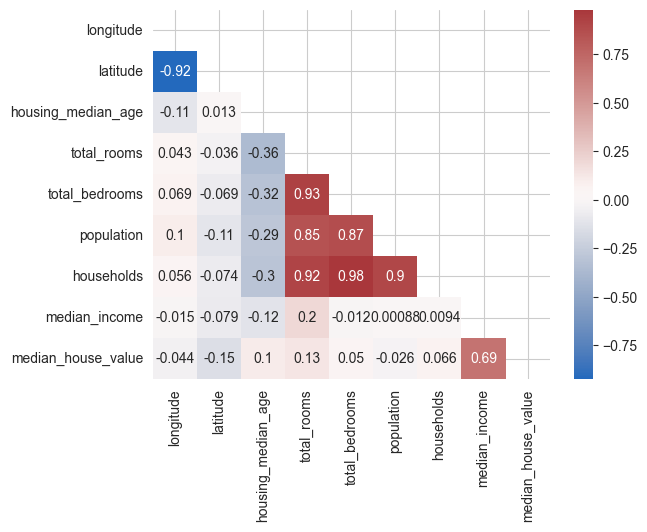

In [16]:
import numpy as np

sns.heatmap(corr, mask=np.triu(corr), annot=True, cmap="vlag")

Wizualizacja korelacji

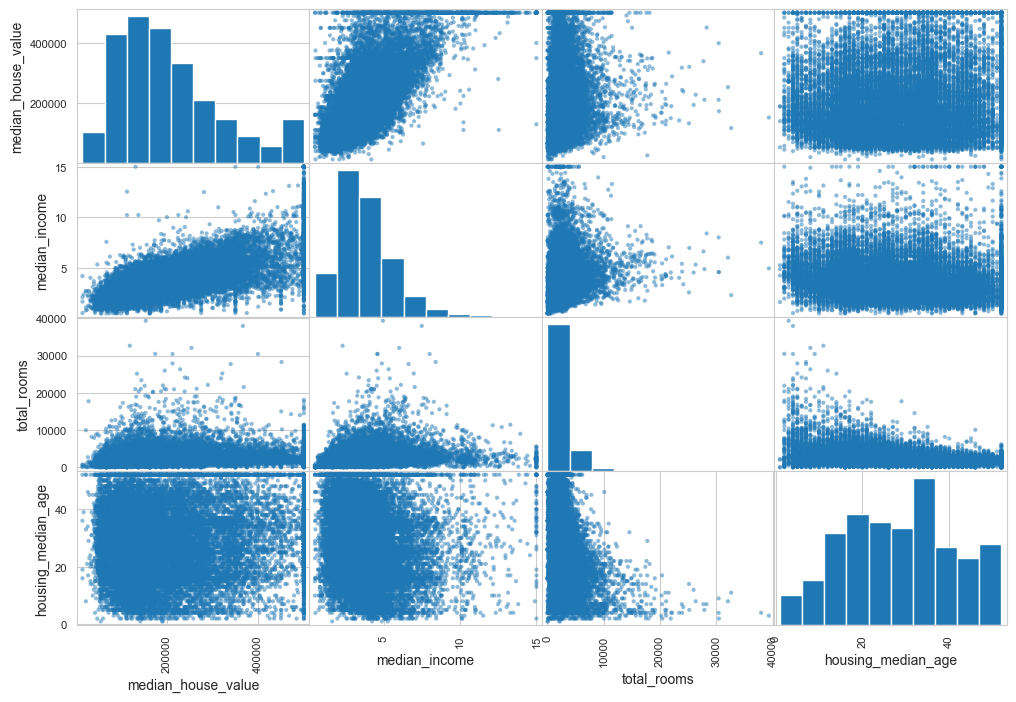

In [17]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[["median_house_value", "median_income", "total_rooms", "housing_median_age"]], figsize=(12, 8))
plt.show()

## Feature engineering (inżyniernia cech)

In [18]:
df_train['rooms_per_family'] = df_train['total_rooms'] / df_train['households']
df_train['bedrooms_ratio'] = df_train['total_bedrooms'] / df_train['total_rooms']
df_train['population_per_house'] = df_train['population'] / df['households']

In [19]:
corr = df_train.drop(labels="ocean_proximity", axis=1).corr()
corr[Y_LABEL].sort_values(ascending=False)

median_house_value      1.000000
median_income           0.687013
rooms_per_family        0.146940
total_rooms             0.134060
housing_median_age      0.104714
households              0.065798
total_bedrooms          0.049993
population_per_house   -0.021577
population             -0.025820
longitude              -0.043603
latitude               -0.146324
bedrooms_ratio         -0.254817
Name: median_house_value, dtype: float64

## Przygotowanie danych pod algorytm uczenia maszynowego

In [20]:
X = df.drop(labels=Y_LABEL, axis=1)
y = df[Y_LABEL]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore"))

In [22]:
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

def ratio_pipeline() -> Pipeline:
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(func=lambda X : X[:, [0]] / X[:, [1]], feature_names_out=lambda a, b : ["ratio"]),
        StandardScaler()
    )

preprocessor = ColumnTransformer([
    ("rooms_per_family", ratio_pipeline(), ["total_rooms", "households"]),
    ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
    ("population_per_house", ratio_pipeline(), ["population", "households"]),
    ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
], remainder=num_pipeline)

In [23]:
preprocessor = preprocessor.fit(X=X_train, y=y_train)

In [24]:
preprocessor.get_feature_names_out()

array(['rooms_per_family__ratio', 'bedrooms__ratio',
       'population_per_house__ratio', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'remainder__longitude', 'remainder__latitude',
       'remainder__housing_median_age', 'remainder__median_income'],
      dtype=object)

In [25]:
X_train_prep = preprocessor.transform(X=X_train)

In [26]:
X_train_prep.shape

(16512, 12)

## Trenowanie modeli uczenia maszynowego

Regresja liniowa

In [27]:
from sklearn.linear_model import LinearRegression

lr_model = make_pipeline(preprocessor, LinearRegression())
lr_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('rooms_per_family',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_pip...
                                                                                       func=<function ratio_pipeline.<locals>.<lambda> at 0x15741eb00>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['population', 'households']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x157046c20>)])),
                ('linearregression', LinearRegression())])

Drzewo decyzyjne

In [28]:
from sklearn.tree import DecisionTreeRegressor

tree_model = make_pipeline(preprocessor, DecisionTreeRegressor())
tree_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('rooms_per_family',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_pip...
                                                                                       func=<function ratio_pipeline.<locals>.<lambda> at 0x15741eb00>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['population', 'households']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x157046c20>)])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

Gradient boosting

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = make_pipeline(preprocessor, GradientBoostingRegressor(verbose=True))
gb_model.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1 11732407770.9852            2.35s
         2 10520228617.9742            2.30s
         3  9517407311.7529            2.29s
         4  8687044113.5186            2.29s
         5  7997038584.6577            2.28s
         6  7416800029.8372            2.26s
         7  6935956001.9939            2.23s
         8  6519089251.2296            2.22s
         9  6180335422.1603            2.20s
        10  5892575032.6797            2.18s
        20  4297497593.8626            1.91s
        30  3626776122.9426            1.66s
        40  3280611130.0438            1.41s
        50  3082469463.8231            1.18s
        60  2897685490.5605            0.94s
        70  2782594702.0815            0.70s
        80  2711204198.2201            0.47s
        90  2631695076.4786            0.23s
       100  2556964463.2727            0.00s


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('rooms_per_family',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_pip...
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['population', 'households']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x157046c20>)])),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(verbose=True))])

Losowe lasy

In [30]:
from sklearn.ensemble import RandomForestRegressor

rf_model = make_pipeline(preprocessor, RandomForestRegressor())
rf_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('rooms_per_family',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_pip...
                                                                                       func=<function ratio_pipeline.<locals>.<lambda> at 0x15741eb00>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['population', 'households']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x157046c20>)])),
                ('randomforestregressor', RandomForestRegressor())])

## Sprawdzian krzyżowy

In [31]:
from sklearn.model_selection import cross_val_score

lr_rmses = -cross_val_score(lr_model, X_train, y_train, scoring="neg_root_mean_squared_error", cv=10)

In [32]:
models = [lr_model, tree_model, rf_model, gb_model]

results = []

for model in models:
    rmse = -cross_val_score(
        model, X_train, y_train, scoring="neg_root_mean_squared_error", cv=3
    )
    results.append(
        dict({"estimator": model.steps[1][0]}, **pd.Series(rmse).describe().to_dict())
    )

df_train_scores = pd.DataFrame(results)
df_train_scores

      Iter       Train Loss   Remaining Time 
         1 11628971977.2999            1.58s
         2 10449175460.5177            1.54s
         3  9448062247.3660            1.54s
         4  8620645939.6129            1.54s
         5  7938179619.2919            1.58s
         6  7373232531.9230            1.61s
         7  6890886608.4111            1.59s
         8  6489749901.0378            1.56s
         9  6150430957.3758            1.53s
        10  5860152680.8499            1.53s
        20  4233069807.8326            1.32s
        30  3569801465.5329            1.14s
        40  3242941061.8225            0.98s
        50  3016106876.3408            0.82s
        60  2858770664.1166            0.65s
        70  2733050281.3573            0.49s
        80  2644610478.4739            0.33s
        90  2557098371.2171            0.17s
       100  2497157837.8840            0.00s
      Iter       Train Loss   Remaining Time 
         1 11643101886.9913            1.56s
        

,estimator,count,mean,std,min,25%,50%,75%,max
0,linearregression,3.0,71428.985495,829.102831,70471.899169,71179.703571,71887.507974,71907.528658,71927.549342
1,decisiontreeregressor,3.0,69964.844516,2161.023693,67715.472396,68934.722906,70153.973415,71089.530576,72025.087737
2,randomforestregressor,3.0,50050.322214,187.512464,49858.626372,49958.807967,50058.989563,50146.170135,50233.350706
3,gradientboostingregressor,3.0,52797.244636,139.798993,52711.229506,52716.591030,52721.952554,52840.252202,52958.551849


## Końcowa ewaluacja na zbiorze testowym

In [33]:
best_model = rf_model

In [34]:
from sklearn.metrics import mean_squared_error


y_pred = rf_model.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Mean squared error: {rmse}")

Mean squared error: 50609.01972599881


Przedział ufności z wykorzystaniem z-score

In [35]:
from scipy import stats

squared_errors = (y_pred - y_test) ** 2
z_scores = stats.norm.ppf((1 + 0.95) / 2)
z_margin = z_scores * (squared_errors).std(ddof=1) / np.sqrt(len(squared_errors))
np.sqrt(squared_errors.mean() - z_margin), np.sqrt(squared_errors.mean() + z_margin)

(48194.000314211204, 52913.93095364286)

Odchylenie standardowe na zbiorze testowym

In [36]:
stdev = np.sqrt(1 / (len(squared_errors) - 2 ) * np.sum(squared_errors) )
print(stdev)

50621.284119666314


In [37]:
stats.sem(squared_errors, ddof=1) / np.sqrt(len(squared_errors))

1894841.5971671452

## Artefakt procesu eksploracji danych - model uczenia maszynowego

Serializacja modelu

In [38]:
import cloudpickle

model_path = Path("../models/best_model.pkl")

if not model_path.parent.exists():
    model_path.parent.mkdir(parents=True)

with open(model_path, "wb") as f:
    cloudpickle.dump(obj=best_model, file=f)

Deserializacja

In [39]:
import joblib
loaded_model = joblib.load(model_path)

df_sample = df.sample(5, random_state=42)
X_sample = df_sample.drop(Y_LABEL, axis=1)
y_sample = df_sample[Y_LABEL]

In [40]:
y_sample_pred = loaded_model.predict(X_sample)

In [41]:
pd.DataFrame({"pred": y_sample_pred, "actual": y_sample})

,pred,actual
20046,97384.00,65600.0
3024,308102.00,353400.0
15663,407686.09,466700.0
20484,364723.15,500001.0
9814,237670.01,286100.0
